In [1]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline
import time

In [ ]:
def convert(imgs, labels, outfile, n):
    imgf = open(imgs, "rb")
    csvf = open(outfile, "w")
    labelf = open(labels, "rb")

    imgf.read(16)
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))]
        for j in range(28*28):
            image.append(ord(imgf.read(1)))
        images.append(image)

    for image in images:
        csvf.write(",".join(str(pix) for pix in image)+"\n")
    imgf.close()
    csvf.close()
    labelf.close()

In [2]:
mnist_train_x = "/content/drive/MyDrive/mnist/train-images.idx3-ubyte"
mnist_train_y = "/content/drive/MyDrive/mnist/train-labels.idx1-ubyte"
mnist_test_x = "/content/drive/MyDrive/mnist/t10k-images.idx3-ubyte"
mnist_test_y = "/content/drive/MyDrive/mnist/t10k-labels.idx1-ubyte"

In [ ]:
convert(mnist_train_x, mnist_train_y, "/content/drive/MyDrive/mnist/train.csv", 60000)
convert(mnist_test_x, mnist_test_y, "/content/drive/MyDrive/mnist/test.csv", 10000)

In [3]:
train_file = open("/content/drive/MyDrive/mnist/train.csv", "r")
train_list = train_file.readlines()
train_file.close()
print(len(train_list))

60000


In [5]:
train_list[4]

'9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,55,148,210,253,253,113,87,148,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,232,252,253,189,210,252,252,253,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,57,242,252,190,65,5,12,182,252,253,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,252,252,183,14,0,0,92,252,252,225,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,253,252,146,14,0,0,0,215,252,252,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,253,247,176,9,0,0,8,78,245,253,129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,232,252,176,0,0,0,36,201,252,252,169,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,252,252,30,22,119,197,241,253,252,251,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,231,252

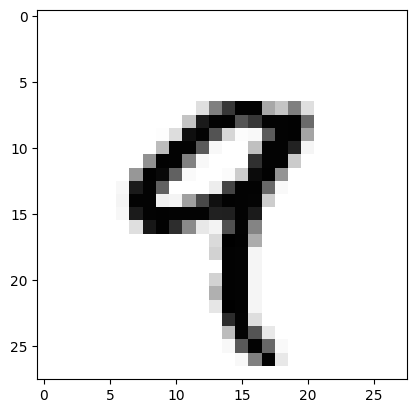

In [7]:
values = train_list[4].split(",")
image_array = np.asfarray(values [1:]).reshape ((28,28))
matplotlib.pyplot.imshow(image_array, cmap="Greys", interpolation="None")

In [8]:
test_file = open("/content/drive/MyDrive/mnist/test.csv", "r")
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [12]:
class DNN:
  def __init__(self, sizes=[784, 128, 64, 10], epochs=30, lr=0.001):
    self.sizes= sizes
    self.epochs=epochs
    self.lr= lr

    input_layer = sizes[0]
    hidden_1 = sizes[1]
    hidden_2 = sizes[2]
    output_layer = sizes[3]

    self.params = {
        'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1./hidden_1),
        "W2":np.random.randn(hidden_2, hidden_1) * np.sqrt(1./hidden_2),
        'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1./output_layer)
    }

  def relu(self, x, derivative=False):
        if derivative:
            return np.where(x > 0, 1, 0)
        return np.maximum(0, x)

  def forward_pass(self, x_train):
        params = self.params

        params['A0'] = x_train

        # input layer to hidden_1
        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.relu(params['Z1'])  # ReLU instead of sigmoid

        # hidden_1 to hidden_2
        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.relu(params['Z2'])  # ReLU instead of sigmoid

        # hidden_2 to output_layer
        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.relu(params['Z3'])

        return params['Z3']

  def backward_pass (self, y_train, output):
    params = self.params

    change_w = {}

    # calculate W3 update
    error = 2 * (output - y_train) / output.shape [0] * self.relu(params['Z3'], derivative=True)
    change_w['W3'] = np.outer(error, params['A2'])

    #calculate W2 update
    error = np.dot(params['W3'].T, error) * self.relu(params['Z2'], derivative=True)
    change_w['W2'] = np.outer(error, params['A1'])

    # calculate W1 update
    error = np.dot(params['W2'].T, error) * self.relu(params['Z1'], derivative=True)  # ReLU derivative
    change_w['W1'] = np.outer(error, params['A0'])


    return change_w

  def update_weights(self, change_w):
    for key, val in change_w.items():
      self.params[key] -= self.lr * val

  def compute_accuracy (self, test_data):
    predictions = []
    for x in test_data:
      values = x.split(",")
      inputs = (np.asfarray(values [1:])/ 255.0 * 0.99) + 0.01
      targets = np.zeros(10) + 0.01
      targets[int(values[0])] = 0.99
      output= self.forward_pass(inputs)
      pred = np.argmax (output)
      predictions.append(pred==np.argmax(targets))

    return np.mean(predictions)

  def train(self, train_list, test_list):
    for i in range(self.epochs):
      start_time = time.time()
      for x in train_list:
        values = x.split(",")
        inputs = (np.asfarray(values[1:]) /255.0 * 0.99) + 0.01
        targets = np.zeros (10) + 0.01
        targets[int(values[0])] = 0.99
        output = self.forward_pass(inputs)
        change_w = self.backward_pass(targets, output)
        self.update_weights (change_w)

      accuracy = self.compute_accuracy(test_list)
      print('Epoch: {0}, Time Spent: {1:.02f}s, Accuracy: {2:.2f}%'.format(i+1, time.time()-start_time, accuracy*100))


In [13]:
dnn = DNN(sizes=[784, 128, 64, 10], epochs=30, lr=0.001)
dnn.train(train_list, test_list)

Epoch: 1, Time Spent: 68.43s, Accuracy: 63.14%
Epoch: 2, Time Spent: 76.07s, Accuracy: 65.78%
Epoch: 3, Time Spent: 71.10s, Accuracy: 66.55%
Epoch: 4, Time Spent: 67.57s, Accuracy: 67.08%
Epoch: 5, Time Spent: 65.47s, Accuracy: 67.38%
Epoch: 6, Time Spent: 68.47s, Accuracy: 67.66%
Epoch: 7, Time Spent: 66.66s, Accuracy: 67.88%
Epoch: 8, Time Spent: 63.87s, Accuracy: 67.99%
Epoch: 9, Time Spent: 68.32s, Accuracy: 68.11%
Epoch: 10, Time Spent: 66.68s, Accuracy: 68.27%
Epoch: 11, Time Spent: 65.85s, Accuracy: 68.37%
Epoch: 12, Time Spent: 64.08s, Accuracy: 68.46%
Epoch: 13, Time Spent: 66.39s, Accuracy: 68.49%
Epoch: 14, Time Spent: 63.75s, Accuracy: 68.54%
Epoch: 15, Time Spent: 66.06s, Accuracy: 68.57%
Epoch: 16, Time Spent: 64.33s, Accuracy: 68.58%
Epoch: 17, Time Spent: 65.83s, Accuracy: 68.63%
Epoch: 18, Time Spent: 64.06s, Accuracy: 68.73%
Epoch: 19, Time Spent: 65.54s, Accuracy: 68.76%
Epoch: 20, Time Spent: 64.64s, Accuracy: 68.80%
Epoch: 21, Time Spent: 68.40s, Accuracy: 68.81%
E